In [2]:
PRIVATE_AUTH_TOKEN_SEATGEEK = "MjM5ODM1NjZ8MTYzNDU5Mjg2NS43NjMwMTI0"
PRIVATE_RAPIDAPI_KEY = "b2f21b901bmsh120d61f7f0c1fd7p19ded6jsnce8f2ed3e01a"

In [39]:
import requests
import json
import tabulate
import math
import pandas
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_colwidth', 60)

In [4]:
url = "https://worldwide-restaurants.p.rapidapi.com/search"
payload = "language=en_US&limit=50&location_id=37209&currency=USD"
headers = {
    'content-type': "application/x-www-form-urlencoded",
    'x-rapidapi-host': "worldwide-restaurants.p.rapidapi.com",
    'x-rapidapi-key': PRIVATE_RAPIDAPI_KEY
    }

restaurants = requests.request("POST", url, data=payload, headers=headers)
eventsSeatgeek = requests.get("https://api.seatgeek.com/2/events?datetime_utc.gte=2022-05-22&datetime_utc.lte=2022-07-31&venue.city=indianapolis&client_id=" + PRIVATE_AUTH_TOKEN_SEATGEEK)

In [6]:
eventsJson = json.loads(eventsSeatgeek.text)
eventDict = {}
for event in eventsJson["events"]:
    eventDict[event['title'] + ' ' + event['datetime_utc']] = (float(event['venue']['location']['lat']), float(event['venue']['location']['lon']))
retaurantsJson = json.loads(restaurants.text)
for restaurant in retaurantsJson["results"]["data"]:
    eventDict[restaurant['name']] = (float(restaurant['latitude']), float(restaurant['longitude']))
## Some conferences that APIs couldn't find!
eventDict["APIC Annual Conference"] = (39.764340,-86.162410)
eventDict["Information/Cybersecurity Officer/IT Officer /Operations Officer Forum"] = (39.909480,-86.118700)

In [40]:
IUPUIDict = {}
IUPUILat = 39.773889979448384
IUPUILon = -86.18491170181358
header = ["Events", "Distance"]
for event,loc in eventDict.items():
    IUPUIDict[event] = math.sqrt((loc[0] - IUPUILat) ** 2 + (loc[1] - IUPUILon) ** 2)
sorted_IUPUIDict = sorted(IUPUIDict.items(), key=lambda item: item[1])
dfIUPUI = pandas.DataFrame(sorted_IUPUIDict, columns=header)
within2miles = 0
for field in sorted_IUPUIDict:
    if (field[1] <= .03): ##within 2ish miles
        within2miles += 1
print("Total viable places within 2 miles: " + str(within2miles))
print(dfIUPUI)

Total viable places within 2 miles: 19
                                                         Events  Distance
0   Tedeschi Trucks Band with Gabe Dixon and St. Paul & The ...  0.016795
1   Barenaked Ladies (Rescheduled from 7/5/2020, 7/2/2021) 2...  0.016795
2   5 Seconds of Summer with The Band Camino 2022-07-15T23:0...  0.016795
3                                                    OP Italian  0.018569
4                                                 High Velocity  0.019070
5                                                 Long's Bakery  0.021137
6                                        Conner's Kitchen + Bar  0.021878
7                                        APIC Annual Conference  0.024444
8                                        Tony's of Indianapolis  0.025280
9                                    Tastings A Wine Experience  0.026082
10                                     Ruth's Chris Steak House  0.026223
11                                           The Capital Grille  0.026522

In [41]:
SpeakEasyDict = {}
SpeakEasyLat = 39.848926068681784
SpeakEasyLon = -86.1410815306477
header = ["Events", "Distance"]
for event,loc in eventDict.items():
    SpeakEasyDict[event] = math.sqrt((loc[0] - SpeakEasyLat) ** 2 + (loc[1] - SpeakEasyLon) ** 2)
sorted_SpeakEasyDict = sorted(SpeakEasyDict.items(), key=lambda item: item[1])
dfSpeakEasy = pandas.DataFrame(sorted_SpeakEasyDict, columns=header)
within2miles = 0
for field in sorted_SpeakEasyDict:
    if (field[1] <= .03): ##within 2ish miles
        within2miles += 1
print("Total viable places within 2 miles: " + str(within2miles))
print(dfSpeakEasy)

Total viable places within 2 miles: 8
                                                         Events  Distance
0                                      Good Morning Mama's Cafe  0.001919
1                         Mama Carolla's Old Italian Restaurant  0.001994
2                                                       Delicia  0.004796
3                                                 Cafe Patachou  0.014612
4                        BRICS - Broad Ripple Ice Cream Station  0.023408
5                                             Fire by the Monon  0.025651
6   Indianapolis Chamber Orchestra - Indianapolis 2022-05-22...  0.029692
7   Indianapolis Chamber Orchestra - Indianapolis 2022-05-22...  0.029692
8   Information/Cybersecurity Officer/IT Officer /Operations...  0.064558
9                                           Mimi Blue Meatballs  0.069711
10                                                   Seasons 52  0.070381
11                                        Sullivan's Steakhouse  0.071050


In [42]:
zWORKSDict = {}
zWORKSLat = 39.951492279416236
zWORKSLon = -86.26088043062407
header = ["Events", "Distance"]
for event,loc in eventDict.items():
    zWORKSDict[event] = math.sqrt((loc[0] - zWORKSLat) ** 2 + (loc[1] - zWORKSLon) ** 2)
sorted_zWORKSDict = sorted(zWORKSDict.items(), key=lambda item: item[1])
dfzWORKS = pandas.DataFrame(sorted_zWORKSDict, columns=header)
within2miles = 0
for field in sorted_zWORKSDict:
    if (field[1] <= .03): ##within 2ish miles
        within2miles += 1
print("Total viable places within 2 miles: " + str(within2miles))
print(dfzWORKS)

Total viable places within 2 miles: 0
                                                         Events  Distance
0                                             Fire by the Monon  0.140595
1                        BRICS - Broad Ripple Ice Cream Station  0.142724
2   Indianapolis Chamber Orchestra - Indianapolis 2022-05-22...  0.144219
3   Indianapolis Chamber Orchestra - Indianapolis 2022-05-22...  0.144219
4   Information/Cybersecurity Officer/IT Officer /Operations...  0.148258
5                                                 Cafe Patachou  0.152234
6                                                    Seasons 52  0.153789
7                                         Sullivan's Steakhouse  0.155203
8                                                       Delicia  0.155453
9                                      Good Morning Mama's Cafe  0.156253
10                        Mama Carolla's Old Italian Restaurant  0.156629
11             Indianapolis 500 Legends Day 2022-05-28T14:00:00  0.158174


In [43]:
FishersDict = {}
FishersLat = 39.966755356658545 
FishersLon = -86.00881953064528
header = ["Events", "Distance"]
for event,loc in eventDict.items():
    FishersDict[event] = math.sqrt((loc[0] - FishersLat) ** 2 + (loc[1] - FishersLon) ** 2)
sorted_FishersDict = sorted(FishersDict.items(), key=lambda item: item[1])
dfFishers = pandas.DataFrame(sorted_FishersDict, columns=header)
within2miles = 0
for field in sorted_FishersDict:
    if (field[1] <= .03): ##within 2ish miles
        within2miles += 1
print("Total viable places within 2 miles: " + str(within2miles))
print(dfFishers)

Total viable places within 2 miles: 0
                                                         Events  Distance
0                                       Caplinger's Fresh Catch  0.085280
1                            Cooper's Hawk Winery & Restaurants  0.101123
2                                      Harry & Izzy's Northside  0.104706
3                                                   Ocean Prime  0.111652
4                                         Sullivan's Steakhouse  0.114995
5                                                    Seasons 52  0.116325
6   Information/Cybersecurity Officer/IT Officer /Operations...  0.123912
7                                             Fire by the Monon  0.163050
8                        BRICS - Broad Ripple Ice Cream Station  0.163381
9                         Mama Carolla's Old Italian Restaurant  0.175630
10                                     Good Morning Mama's Cafe  0.176105
11                                                      Delicia  0.181619


In [44]:
IndustriousDict = {}
IndustriousLat = 39.772380233351356
IndustriousLon = -86.15310153064928
header = ["Events", "Distance"]
for event,loc in eventDict.items():
    IndustriousDict[event] = math.sqrt((loc[0] - IndustriousLat) ** 2 + (loc[1] - IndustriousLon) ** 2)
sorted_IndustriousDict = sorted(IndustriousDict.items(), key=lambda item: item[1])
dfIndustrious = pandas.DataFrame(sorted_IndustriousDict, columns=header)
within2miles = 0
for field in sorted_IndustriousDict:
    if (field[1] <= .03): ##within 2ish miles
        within2miles += 1
print("Total viable places within 2 miles: " + str(within2miles))
print(dfIndustrious)

Total viable places within 2 miles: 39
                                                         Events  Distance
0                                                   Bakersfield  0.000527
1                                                Bazbeaux Pizza  0.000863
2                                         The Eagle on Mass Ave  0.001060
3                                                Bru Burger Bar  0.001426
4                                   Wallows 2022-06-07T00:00:00  0.002844
5                              Celtic Woman 2022-06-03T23:30:00  0.003279
6                                Tom Segura 2022-06-11T23:00:00  0.003279
7                                                      Union 50  0.005377
8                             Fogo de Chao Brazilian Steakhouse  0.006255
9                                                          Vida  0.006376
10                                           The Capital Grille  0.007866
11                            St. Joseph Brewery & Public House  0.007884

In [45]:
LaunchDict = {}
LaunchLat = 39.7593320841315
LaunchLon = -86.15805743064958
header = ["Events", "Distance"]
for event,loc in eventDict.items():
    LaunchDict[event] = math.sqrt((loc[0] - LaunchLat) ** 2 + (loc[1] - LaunchLon) ** 2)
sorted_LaunchDict = sorted(LaunchDict.items(), key=lambda item: item[1])
dfLaunch = pandas.DataFrame(sorted_LaunchDict, columns=header)
within2miles = 0
for field in sorted_LaunchDict:
    if (field[1] <= .03): ##within 2ish miles
        within2miles += 1
print("Total viable places within 2 miles: " + str(within2miles))
print(dfLaunch)

Total viable places within 2 miles: 39
                                                         Events  Distance
0                                           Slippery Noodle Inn  0.002397
1                                        Shapiro's Delicatessen  0.003315
2                                  Greek Islands Restaurant INC  0.004260
3                                               Yolk - City Way  0.004912
4                                              Harry and Izzy's  0.005310
5                                       Iozzo's Garden of Italy  0.005321
6                                          St. Elmo Steak House  0.005851
7                                                    Yard House  0.006092
8                                    The Oceanaire Seafood Room  0.006516
9                                                          Nada  0.006555
10                                       APIC Annual Conference  0.006635
11                                     Ruth's Chris Steak House  0.007100

array([[<AxesSubplot:title={'center':'Distance'}>]], dtype=object)

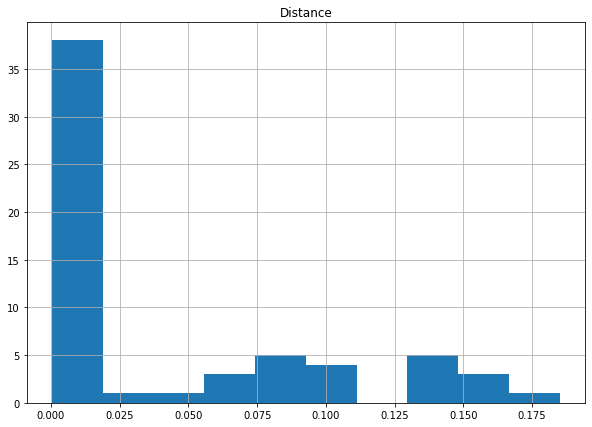

In [162]:
dfIndustrious.hist(column = "Distance", figsize = [10,7])

array([[<AxesSubplot:title={'center':'Distance'}>]], dtype=object)

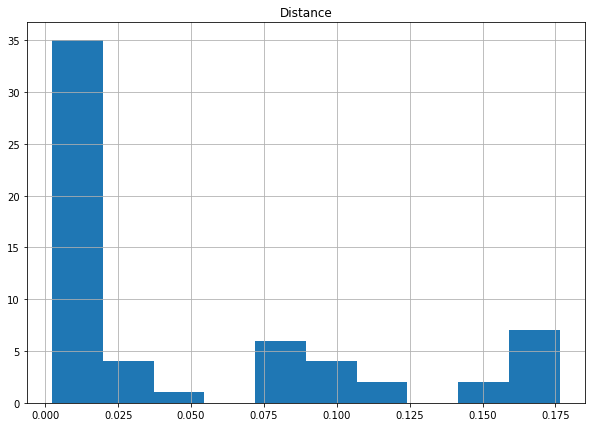

In [161]:
dfLaunch.hist(column = "Distance", figsize = [10,7])